In [2]:
import numpy as np

X = 5 * np.random.rand(100, 1)
y = 10 + 7 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
theta_best= np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[10.13876051],
       [ 6.94548246]])

In [3]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [4]:
y_predict

array([[10.13876051],
       [24.02972543]])

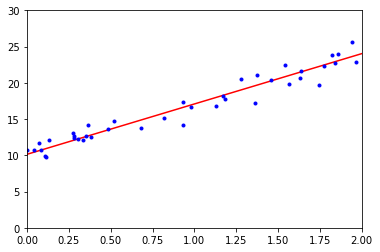

In [5]:
from matplotlib import pyplot as plt

plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 30])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([10.13876051]), array([[6.94548246]]))

<h3>Batch Gradient Descent</h3>

In [7]:
lr = 0.1
n_iterations = 1000
m = 100 

theta = np.random.randn(2, 1)

In [8]:
theta.shape

(2, 1)

In [9]:
theta

array([[0.05393573],
       [0.78845637]])

In [10]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - lr * gradients

In [11]:
theta

array([[10.13876051],
       [ 6.94548246]])

<h3>Stochastic Gradient Descent</h3>

In [12]:
# Learning Schedule hyperparameters
n_epochs = 50
t0, t1 = 5, 50  

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # Random Initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(epoch * m + i)
        theta = theta - lr * gradients



In [13]:
theta

array([[10.2324773 ],
       [ 6.92155398]])

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([10.07219054]), array([6.81310315]))

<h3>Polynomial Regression</h3>

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [17]:
X.shape

(100, 1)

In [18]:
X[0]

array([-0.46142144])

Text(0, 0.5, 'y')

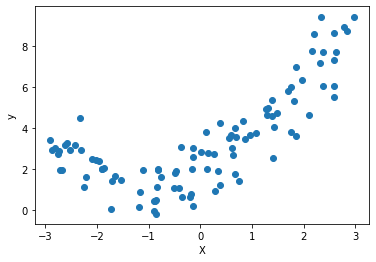

In [19]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([-0.46142144])

In [35]:
X[0]

array([2.91766097])

In [22]:
X_poly[0]

array([-0.46142144,  0.21290974])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95843932]), array([[1.03225497, 0.4976456 ]]))

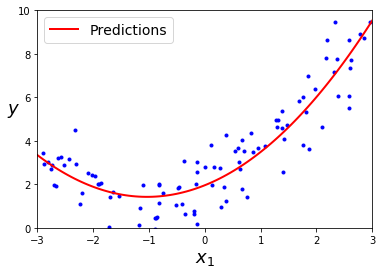

In [24]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.savefig("quadratic_predictions_plot")
plt.show()

<h3>Ridge Regression</h3>

In [25]:
np.random.seed(2020)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [26]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=2020)
ridge_reg.fit(X, y)
ridge_reg.predict([X[1]])

array([[2.4751736]])

<h3>Least Absolute Shrinkage and Selection Operator Regression</h3>


In [27]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([X[1]])

array([2.32941081])

<h3>ElasticNet</h3>

In [28]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([X[1]])

array([2.38212157])

<h3>Early Stopping</h3>

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(2020)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=7)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)



In [30]:
X_train_poly_scaled.shape

(25, 90)

In [31]:
X_train.shape

(25, 1)

In [32]:
X_val.shape

(25, 1)

In [33]:
sgd_reg = SGDRegressor(max_iter=1, 
                       tol=-np.infty, 
                       warm_start=True, 
                       penalty=None, 
                       learning_rate="constant",
                       eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch

NameError: name 'val_error' is not defined